# EE219 Project 4: Regression Analysis

### Team members:
* **Yin Fei** 404284074

* **Yichen Wu** 504294181

* **Siyuan Chen** 405024391

* **Ruchen Zhen** 205036408

### Required Packages:
python 3.6  
numpy v1.14.0  
scikit-learn v0.19.1  
scipy v1.0.0  
matplotlib v2.1.2  
pandas v0.22.0   


### Part 1) Load the dataset.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df=pd.read_csv('data/network_backup_dataset.csv',header=0)
df_index=['Week #','Day of Week','Backup Start Time - Hour of Day','Work-Flow-ID','File Name','Size of Backup (GB)','Backup Time (hour)','day number']
map_day = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

In [82]:
day_number=[]
for weeknum,dayofweek in np.array(df[df_index[:2]]):
    day_number.append((weeknum-1)*7+map_day[dayofweek])
df['day number']=day_number

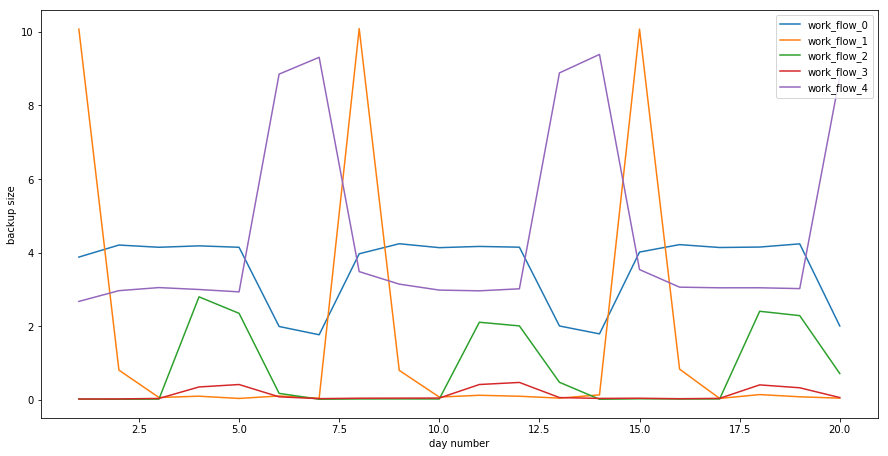

In [83]:
df_part1a=df.loc[df[df_index[-1]]<=20]
workflowlist=np.unique(df_part1a[df_index[3]])
plt.figure(figsize = (15,7.5))
for i in range(len(workflowlist)):
    temp=df_part1a.loc[df_part1a[df_index[3]]==workflowlist[i]]
    tempbackup=[]
    for j in range(1,21):
        tempbackup.append(sum(temp.loc[temp[df_index[-1]]==j][df_index[5]]))
    plt.plot(range(1,21),tempbackup,label=workflowlist[i])
plt.legend(loc = 'upper right')
plt.ylabel('backup size')
plt.xlabel('day number')
plt.show()

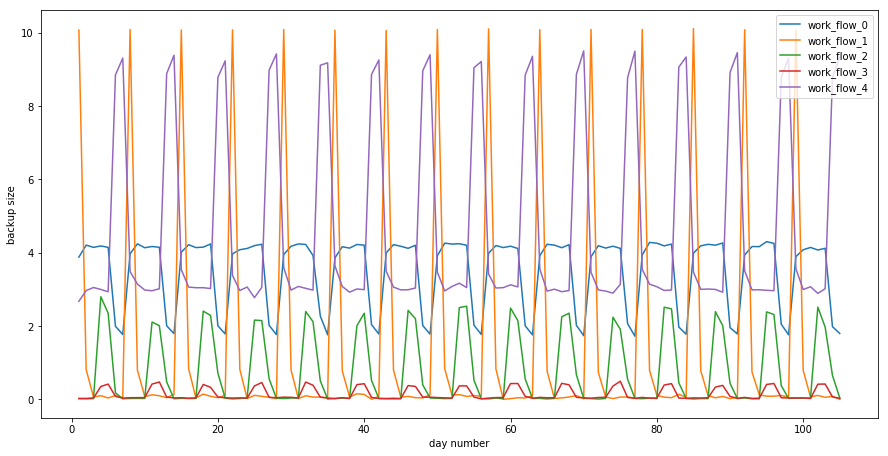

In [84]:
df_part1b=df.loc[df[df_index[-1]]<=105]
workflowlist=np.unique(df_part1b[df_index[3]])
plt.figure(figsize = (15,7.5))
for i in range(len(workflowlist)):
    temp=df_part1b.loc[df_part1b[df_index[3]]==workflowlist[i]]
    tempbackup=[]
    for j in range(1,106):
        tempbackup.append(sum(temp.loc[temp[df_index[-1]]==j][df_index[5]]))
    plt.plot(range(1,106),tempbackup,label=workflowlist[i])
plt.legend(loc = 'upper right')
plt.ylabel('backup size')
plt.xlabel('day number')
plt.show()

## part 2)

### a)

In [85]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [86]:
df.tail(3)

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name,Size of Backup (GB),Backup Time (hour),day number
18585,15,Sunday,21,work_flow_4,File_26,0.198572,2,105
18586,15,Sunday,21,work_flow_4,File_25,0.199570,2,105
18587,15,Sunday,21,work_flow_4,File_24,0.201201,2,105


In [87]:
week_number=df[df_index[0]].tolist()
day_of_week=[]
for day in df[df_index[1]].tolist():
    day_of_week.append(map_day[day])
hour_of_day=df[df_index[2]].tolist()
workflowid=df[df_index[3]].tolist()
for i in range(len(workflowid)):
    workflowid[i]=workflowid[i][-1]
    workflowid[i]=int(workflowid[i])
filename=df[df_index[4]].tolist()
for i in range(len(filename)):
    filename[i]=filename[i].replace('File_','')
    filename[i]=int(filename[i])

In [88]:
featurematrix=np.stack((week_number,day_of_week,hour_of_day,workflowid,filename),axis=-1)

In [89]:
y=df[df_index[5]].tolist()

In [90]:
basicregression=LinearRegression()

In [91]:
from sklearn.model_selection import cross_validate
cv_results=cross_validate(basicregression, featurematrix, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)

In [92]:
cv_results['train_score']

array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
       -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])

In [93]:
cv_results['test_score']

array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
       -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943])

In [94]:
def reportandplot(clf,X,y):
    results=cross_validate(clf, X, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
    clf.fit(X,y)
    y_predict=clf.predict(X)
    plt.scatter(y,y_predict)
    plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw = 4)
    plt.xlabel('True values')
    plt.ylabel('Fitted values')
    plt.show()
    plt.scatter(y_predict,y-y_predict)
    plt.xlabel('Fitted values')
    plt.ylabel('Residual')
    plt.show()
    return results

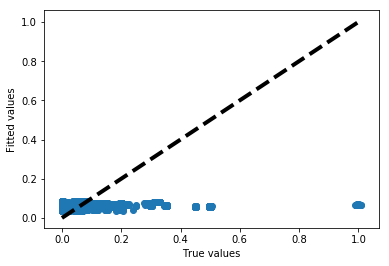

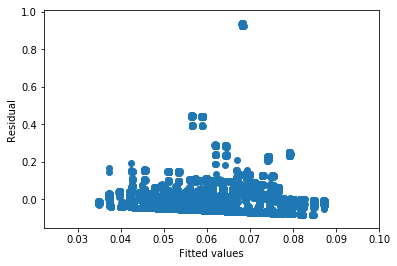

{'fit_time': array([ 0.00451493,  0.00346494,  0.00397325,  0.00393581,  0.00451207,
         0.00441289,  0.00409698,  0.00354791,  0.00344515,  0.00293183]),
 'score_time': array([ 0.00030494,  0.00033593,  0.00039792,  0.00038004,  0.00035119,
         0.00043607,  0.00032187,  0.00026107,  0.00030589,  0.0002172 ]),
 'test_score': array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
        -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943]),
 'train_score': array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
        -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])}

In [95]:
reportandplot(basicregression,featurematrix,y)

In [96]:
stand=StandardScaler()
X_stand=stand.fit_transform(featurematrix)

/Users/FeiYin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


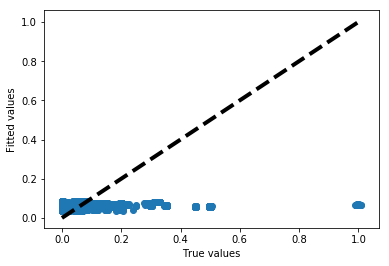

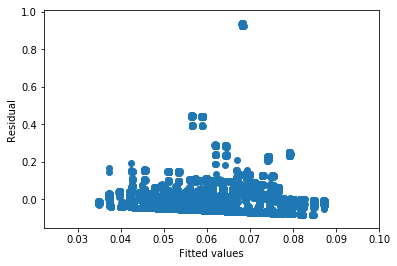

{'fit_time': array([ 0.0047152 ,  0.0050323 ,  0.00375223,  0.00469398,  0.00444603,
         0.0040071 ,  0.00370312,  0.00324988,  0.00316691,  0.00331807]),
 'score_time': array([ 0.00053191,  0.00046587,  0.00025964,  0.00036216,  0.0003829 ,
         0.00039172,  0.00030112,  0.00028014,  0.00033903,  0.00024772]),
 'test_score': array([-0.01138874, -0.01003696, -0.01141687, -0.01007355, -0.01147381,
        -0.01008927, -0.01145976, -0.01009355, -0.01146488, -0.00998943]),
 'train_score': array([-0.01065915, -0.01080909, -0.01065557, -0.01080486, -0.01064923,
        -0.01080319, -0.01065078, -0.01080277, -0.01065044, -0.01081425])}

In [97]:
reportandplot(basicregression,X_stand,y)

In [98]:
from sklearn.feature_selection import f_regression
f_regression(featurematrix,y)

(array([  8.45006257e-03,   3.88163798e+01,   1.50740934e+02,
          2.61386654e+01,   2.53200943e+01]),
 array([  9.26759237e-01,   4.75614169e-10,   1.62474985e-34,
          3.20909922e-07,   4.90153868e-07]))

In [99]:
from sklearn.feature_selection import mutual_info_regression
mutualscore=mutual_info_regression(featurematrix,y)

/Users/FeiYin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [100]:
np.argsort(mutualscore)
# chose last three features

array([0, 1, 2, 3, 4])

In [101]:
mutualscore

array([ 0.        ,  0.22692659,  0.23046296,  0.26999371,  0.43333813])

In [102]:
featurematrix[:,2:]

array([[ 1,  0,  0],
       [ 1,  2, 12],
       [ 1,  2, 13],
       ..., 
       [21,  4, 26],
       [21,  4, 25],
       [21,  4, 24]])

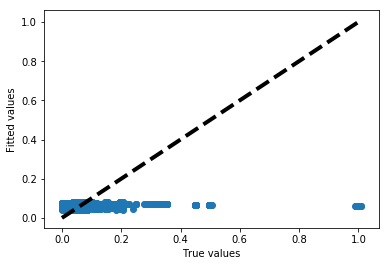

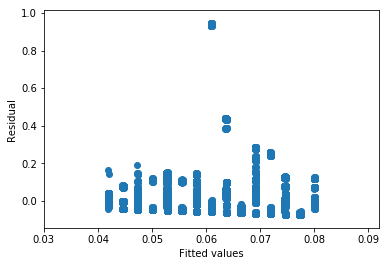

{'fit_time': array([ 0.00500393,  0.00653505,  0.00590372,  0.00546193,  0.00615191,
         0.006078  ,  0.00577283,  0.00534201,  0.00886989,  0.00787401]),
 'score_time': array([ 0.00034595,  0.00048995,  0.00028896,  0.00032687,  0.00037599,
         0.00041103,  0.00026417,  0.00047612,  0.00034523,  0.00102496]),
 'test_score': array([-0.0114225 , -0.01003736, -0.01145544, -0.01007821, -0.01151353,
        -0.01009186, -0.01149547, -0.01009676, -0.01150352, -0.00999224]),
 'train_score': array([-0.01068007, -0.01083378, -0.01067618, -0.01082926, -0.01066974,
        -0.01082779, -0.01067173, -0.01082728, -0.01067094, -0.01083877])}

In [103]:
reportandplot(basicregression,featurematrix[:,2:],y)

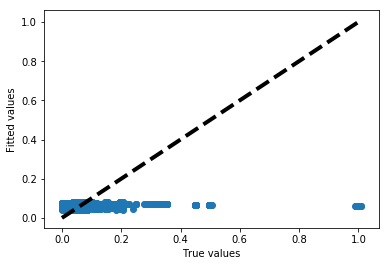

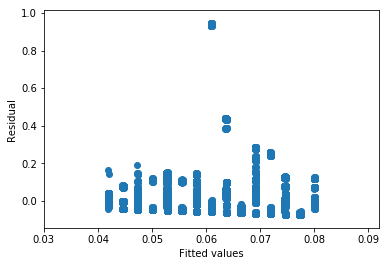

{'fit_time': array([ 0.00615096,  0.00440598,  0.00469589,  0.0043788 ,  0.00375891,
         0.00433517,  0.00323796,  0.00313711,  0.00307775,  0.00323701]),
 'score_time': array([ 0.00052309,  0.00035   ,  0.00050402,  0.00024319,  0.00024223,
         0.00023603,  0.00018716,  0.00018287,  0.00018215,  0.00019598]),
 'test_score': array([-0.0114225 , -0.01003736, -0.01145544, -0.01007821, -0.01151353,
        -0.01009186, -0.01149547, -0.01009676, -0.01150352, -0.00999224]),
 'train_score': array([-0.01068007, -0.01083378, -0.01067618, -0.01082926, -0.01066974,
        -0.01082779, -0.01067173, -0.01082728, -0.01067094, -0.01083877])}

In [104]:
reportandplot(basicregression,X_stand[:,2:],y)

In [130]:
# omit the comb where no feature is chosen, so 31 comb in total
import itertools
parta4=LinearRegression()
allcomb=[]
testscoreall=[]
trainscoreall=[]
for i in range(1,6):
    for item in (list(itertools.combinations(range(5),i))):
        print (item)
        allcomb.append(item)
        poslist=[]
        for pos in item:
            poslist.append(pos)
        X_desire=featurematrix[:,poslist]
        print (X_desire.shape)
        results=cross_validate(parta4, X_desire, y, scoring='neg_mean_squared_error', cv=10, return_train_score=True)
        testscoreall.append(np.mean(results['test_score']))
        trainscoreall.append(np.mean(results['train_score']))
        print (np.mean(results['test_score']))
        print (np.mean(results['train_score']))

(0,)
(18588, 1)
-0.0108558137955
-0.0108554642772
(1,)
(18588, 1)
-0.0108345036184
-0.0108327744568
(2,)
(18588, 1)
-0.0107686449504
-0.010768124363
(3,)
(18588, 1)
-0.0108550709977
-0.0108394590724
(4,)
(18588, 1)
-0.0108550326918
-0.0108399629593
(0, 1)
(18588, 2)
-0.0108360898456
-0.01083269921
(0, 2)
(18588, 2)
-0.010768711948
-0.0107681157621
(0, 3)
(18588, 2)
-0.0108552847401
-0.0108394443606
(0, 4)
(18588, 2)
-0.0108552463529
-0.0108399482333
(1, 2)
(18588, 2)
-0.0107468954747
-0.0107449958082
(1, 3)
(18588, 2)
-0.0108346422827
-0.0108173173864
(1, 4)
(18588, 2)
-0.0108345798736
-0.0108178022582
(2, 3)
(18588, 2)
-0.0107686782477
-0.0107525621917
(2, 4)
(18588, 2)
-0.0107686199875
-0.0107530473389
(3, 4)
(18588, 2)
-0.010855081245
-0.0108394523579
(0, 1, 2)
(18588, 3)
-0.0107479678501
-0.0107449427801
(0, 1, 3)
(18588, 3)
-0.0108362175286
-0.0108172425087
(0, 1, 4)
(18588, 3)
-0.0108361558776
-0.0108177273304
(0, 2, 3)
(18588, 3)
-0.0107687482491
-0.0107525533438
(0, 2, 4)
(1858

In [131]:
featurematrix.shape

(18588, 5)

In [132]:
min(testscoreall)

-0.010855813795463505

In [133]:
max(testscoreall)

-0.010746895474743634

In [134]:
np.argsort(testscoreall)[-1]

9

In [135]:
allcomb[9]

(1, 2)

In [136]:
# feature 'day_of_week,hour_of_day' have the best performance?????